In [33]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
ads = pd.read_csv('ten_scrapped_data_fixed.csv', names=['ad'])
ads.head()

,ad
0,JR2 Shining Double Row Crystal Metal License P...
1,"[Upgraded]BOYISEN Trailer Hitch Pin Lock, 1/2""..."
2,SUMEX 5070138b Hubcap
3,Rugged Ridge 15201.16 1.25 Wheel Spacer for 20...
4,"Bondhus 33034 Set of 8 Star T-handles, Graduat..."


In [16]:
ads.describe()

,ad
count,10000
unique,9934
top,USB Printer with 3 Year Printer Warranty
freq,6


In [17]:
ads.dropna()

,ad
0,JR2 Shining Double Row Crystal Metal License P...
1,"[Upgraded]BOYISEN Trailer Hitch Pin Lock, 1/2""..."
2,SUMEX 5070138b Hubcap
3,Rugged Ridge 15201.16 1.25 Wheel Spacer for 20...
4,"Bondhus 33034 Set of 8 Star T-handles, Graduat..."
...,...
9995,GUESS Women's U0700L3 Digital White Silicone W...
9996,NIXON - Unisex Adult Watch - A10583053-00
9997,Shinola The Canfield Quartz Movement White Dia...
9998,Invicta Women's Bolt Quartz Watch with Stainle...


### Retrieving unique values to a new dataset

In [18]:
ads_unique = pd.DataFrame(ads['ad'].unique(), columns = ['ad'])
ads_unique.describe()

,ad
count,9934
unique,9934
top,Ergotron WorkFit Dual Monitor Kit
freq,1


### Making a column of <i>string</i> values to avoid any errors

In [21]:
ads_unique['str'] = pd.DataFrame(ads_unique['ad'].astype('str'))
ads_unique.describe()

,ad,str
count,9934,9934
unique,9934,9934
top,Ergotron WorkFit Dual Monitor Kit,Ergotron WorkFit Dual Monitor Kit
freq,1,1


# Text Clustering

### Feature extraction

In [24]:
vec = TfidfVectorizer(stop_words='english')
vec.fit(ads_unique.str.values)
features = vec.transform(ads_unique.str.values)

### Model Training

In [25]:
cls = MiniBatchKMeans(n_clusters=10, random_state=0)
cls.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=0,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [26]:
cls.predict(features)
cls.labels_

array([3, 3, 3, ..., 8, 8, 8], dtype=int32)

### Visualization

In [27]:
# reduced the features to 2D
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_clusrter_centers = pca.transform(cls.cluster_centers_)

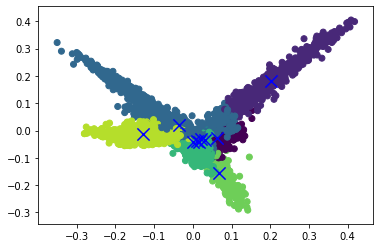

In [35]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_clusrter_centers[:, 0], reduced_clusrter_centers[:,1], marker='x', s=150, c='b')

### Evalauation with unlabelled dataset

In [36]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls.predict(features))

0.017464299439119837

# Topic Modeling

### Model training

In [39]:
# number of topics to extract
n_topics = 10

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vec = TfidfVectorizer(max_features=1000, stop_words="english", max_df=0.95, min_df=2)
features = vec.fit_transform(ads_unique.str)

from sklearn.decomposition import NMF
cls = NMF(n_components=n_topics, random_state=0)
cls.fit(features)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=10, random_state=0, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [40]:
# list of unique words found by the vectorizer
feature_names = vec.get_feature_names()

# number of most influencing words to display per topic
n_top_words = 15

for i, topic_vec in enumerate(cls.components_):
    print(i, end=' ')
    # topic_vec.argsort() produces a new array
    # in which word_index with the least score is the
    # first array element and word_index with highest
    # score is the last array element. Then using a
    # fancy indexing [-1: -n_top_words-1:-1], we are
    # slicing the array from its end in such a way that
    # top `n_top_words` word_index with highest scores
    # are returned in desceding order
    for fid in topic_vec.argsort()[-1:-n_top_words-1:-1]:
        print(feature_names[fid], end=' ')
    print()

0 sneaker women fashion skechers puma slip lace propet new shoes metallic swiss shoe sport cole 
1 watch quartz strap steel leather stainless model analogue womens analog gold women dial ladies silver 
2 backpack bag school laptop travel men girls daypack size college canvas mini large 15 bookbag 
3 headphones ear bluetooth wireless earbuds noise earphones mic stereo cancelling headset microphone sports wired bass 
4 jeans skinny women rise denim jean high ankle mid pants stretch womens straight fit waist 
5 monitor inch lcd led screen hdmi ips hd 27 display vga 24 lit dell gaming 
6 printer photo hp color canon laser wireless inkjet lexmark monochrome printing copier epson laserjet scanner 
7 shower curtain bathroom set 72 white hooks towel holder fabric bath storage home pack 12 
8 women low sneakers trainers uk puma shoes hi geox white slip jean shoe platform lace 
9 black wheel tire size caps chair valve car stem leather center cap unisex white pack 
